<a href="https://colab.research.google.com/github/cmannnn/mnist/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

In [2]:
# reading in MNIST datasets
mnist_train = pd.read_csv('sample_data/mnist_train_small.csv')
mnist_test = pd.read_csv('sample_data/mnist_test.csv')

In [4]:
# checking training data shape
mnist_train.shape

(19999, 785)

In [24]:
# checking testing data shape
mnist_test.shape

(9999, 785)

In [23]:
# splitting train data into features and targets
mnist_train_y = mnist_train['6']
mnist_train_X = mnist_train.drop(['6'], axis=1)

In [26]:
# checking train y shape
mnist_train_y.shape

(19999,)

In [28]:
# checking train X shape
mnist_train_X.shape

(19999, 784)

In [32]:
# viewing one of the numbers
some_digit = np.array(mnist_train_X[:1])
some_digit_image = some_digit.reshape(28, 28)

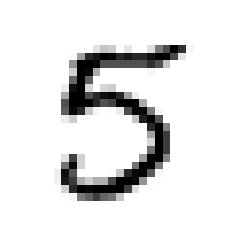

In [31]:
# displaying the image
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()